# 1. Import libraries and data

In [1]:
# import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# define project folder path
path = r'C:\Users\nsmith\OneDrive - Georgia Poultry Laboratory Network\CareerFoundry\02 - Data Immersion\Achievement 4\12-2024 Instacart Basket Analysis'

In [3]:
# import project data
df = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'completed_data.pkl'))

In [4]:
# import project data
regions = pd.read_csv(os.path.join(path, '02 Data', 'Original Data', 'regions.csv'))

In [5]:
# import project data
departments = pd.read_csv(os.path.join(path, '02 Data', 'Original Data', 'departments.csv'))

   # 2. Inspect data

### Merged data containing order, product, and customer information

In [6]:
# view row count
df.shape

(32404859, 35)

In [7]:
# view first 10 rows
df.head(10)

,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,first_order,product_id,add_to_cart_order,reordered,...,first_name,last_name,gender,state,age,date_joined,n_dependants,fam_status,income,_merge
0,2539329,1,1,2,8,NaN,True,196,1,0,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
1,2398795,1,2,3,7,15.0,False,196,1,1,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
2,473747,1,3,3,12,21.0,False,196,1,1,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
3,2254736,1,4,4,7,29.0,False,196,1,1,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
4,431534,1,5,4,15,28.0,False,196,1,1,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
5,3367565,1,6,2,7,19.0,False,196,1,1,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
6,550135,1,7,1,9,20.0,False,196,1,1,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
7,3108588,1,8,1,14,14.0,False,196,2,1,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
8,2295261,1,9,1,16,0.0,False,196,4,1,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
9,2550362,1,10,4,8,30.0,False,196,1,1,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both


In [8]:
# describe dataset
df['prices'].describe()

count    3.239973e+07
mean     7.790994e+00
std      4.241809e+00
min      1.000000e+00
25%      4.200000e+00
50%      7.400000e+00
75%      1.130000e+01
max      2.500000e+01
Name: prices, dtype: float64

In [9]:
# view the mean
df['prices'].mean()

7.790994092173359

In [10]:
# view the median
df['prices'].median()

7.4

In [11]:
# view the max
df['prices'].max()

25.0

In [12]:
# view data type of state column
df['state'].dtype

dtype('O')

### Regions data containing state and region

In [13]:
# view first 10 rows
regions.head(10)

,state,region
0,Maine,Region 1 (Northeast)
1,New Hampshire,Region 1 (Northeast)
2,Vermont,Region 1 (Northeast)
3,Massachusetts,Region 1 (Northeast)
4,Rhode Island,Region 1 (Northeast)
5,Connecticut,Region 1 (Northeast)
6,New York,Region 1 (Northeast)
7,Pennsylvania,Region 1 (Northeast)
8,New Jersey,Region 1 (Northeast)
9,Wisconsin,Region 2 (Midwest)


In [14]:
regions.dtypes

state     object
region    object
dtype: object

In [15]:
regions.shape

(51, 2)

In [16]:
regions['region'].value_counts()

Region 3 (South)        17
Region 4 (West)         13
Region 2 (Midwest)      12
Region 1 (Northeast)     9
Name: region, dtype: int64

# 3. Identify and remove PII

#### Table contains first and last names of individuals. This identifying information is not needed for the analysis and can be removed.

In [17]:
# Drop column with personal information
df.drop('first_name', axis=1, inplace=True)


In [19]:
# Drop column with personal information
df.drop('last_name', axis=1, inplace=True)


In [20]:
# Drop merge flag
df.drop('_merge', axis=1, inplace=True)

In [21]:
# Drop merge flag
df.drop('merge_flag', axis=1, inplace=True)

In [22]:
# check columns
df.columns

Index(['order_id', 'user_id', 'order_number', 'order_day_of_week',
       'order_hour_of_day', 'days_since_prior_order', 'first_order',
       'product_id', 'add_to_cart_order', 'reordered', 'product_name',
       'aisle_id', 'department_id', 'prices', 'price_range_loc', 'busiest_day',
       'busiest_days', 'busiest_period_of_day', 'max_order', 'loyalty_flag',
       'spending', 'spending_flag', 'frequency', 'frequency_flag', 'gender',
       'state', 'age', 'date_joined', 'n_dependants', 'fam_status', 'income'],
      dtype='object')

# 4. Geographic comparison

### Create regions column based on state

#### Explore states column in primary dataset to ensure there are no missing or unexpected values before performing join.

In [23]:
# check for missing values in state column
df['state'].isna().value_counts()

False    32404859
Name: state, dtype: int64

In [24]:
# check to see if there are any unexpected values in state column
states = df['state'].value_counts()

In [25]:
states

Pennsylvania            667082
California              659783
Rhode Island            656913
Georgia                 656389
New Mexico              654494
Arizona                 653964
North Carolina          651900
Oklahoma                651739
Alaska                  648495
Minnesota               647825
Massachusetts           646358
Wyoming                 644255
Virginia                641421
Missouri                640732
Texas                   640394
Colorado                639280
Maine                   638583
North Dakota            638491
Alabama                 638003
Kansas                  637538
Louisiana               637482
Delaware                637024
South Carolina          636754
Oregon                  636425
Arkansas                636144
Nevada                  636139
New York                635983
Montana                 635265
South Dakota            633772
Illinois                633024
Hawaii                  632901
Washington              632852
Mississi

In [26]:
states.shape

(51,)

#### Merge tables to add new region column and verify new table

In [27]:
# merge regions table on state
df_merge = df.merge(regions, on = 'state', indicator = True)

In [28]:
# view first 10 rows of new df
df_merge.head(10)

,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,first_order,product_id,add_to_cart_order,reordered,...,frequency_flag,gender,state,age,date_joined,n_dependants,fam_status,income,region,_merge
0,2539329,1,1,2,8,NaN,True,196,1,0,...,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,Region 3 (South),both
1,2398795,1,2,3,7,15.0,False,196,1,1,...,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,Region 3 (South),both
2,473747,1,3,3,12,21.0,False,196,1,1,...,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,Region 3 (South),both
3,2254736,1,4,4,7,29.0,False,196,1,1,...,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,Region 3 (South),both
4,431534,1,5,4,15,28.0,False,196,1,1,...,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,Region 3 (South),both
5,3367565,1,6,2,7,19.0,False,196,1,1,...,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,Region 3 (South),both
6,550135,1,7,1,9,20.0,False,196,1,1,...,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,Region 3 (South),both
7,3108588,1,8,1,14,14.0,False,196,2,1,...,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,Region 3 (South),both
8,2295261,1,9,1,16,0.0,False,196,4,1,...,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,Region 3 (South),both
9,2550362,1,10,4,8,30.0,False,196,1,1,...,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,Region 3 (South),both


In [29]:
# verify number of rows after join
df_merge.shape

(32404859, 33)

### Perform analysis with new column

In [30]:
crosstab = pd.crosstab(df_merge['spending_flag'], df_merge['region'], dropna = False)

In [31]:
crosstab

region,Region 1 (Northeast),Region 2 (Midwest),Region 3 (South),Region 4 (West)
spending_flag,,,,
High spender,108225,155975,209691,160354
Low spender,5614511,7441350,10582194,8132559


# 5. Create dataset with low-activity customers excluded

### Create an exclusion flag

In [32]:
# add a flag
df_merge.loc[df_merge['max_order'] >= 5, 'activity_flag'] = 'Active'

In [33]:
# inspect new variable
df_merge[['max_order', 'activity_flag']].head(10)

,max_order,activity_flag
0,10,Active
1,10,Active
2,10,Active
3,10,Active
4,10,Active
5,10,Active
6,10,Active
7,10,Active
8,10,Active
9,10,Active


In [34]:
df_merge['activity_flag'].value_counts()

Active    30964564
Name: activity_flag, dtype: int64

### Filter data to new dataframe

In [35]:
# Filter rows where Flag is "Active"
df_merge_active = df_merge[df_merge['activity_flag'] == 'Active']

MemoryError: Unable to allocate 3.46 GiB for an array with shape (15, 30964564) and data type object

In [ ]:
# view new table
df_merge_active.head()

In [ ]:
# Verify that all max orders are 
df_merge_active['max_order'].min()

In [ ]:
# Verify number of rows is the same as active flag value count
df_merge_active.shape

#### New data table is filtered to include only customers with 5 or more orders. This is verified by checking to ensure there are no max order values below 5 and that the count of rows in the new table is equal to the count of rows in the original table where the activity flag is "active."

### Export sample

In [ ]:
# Export data to pkl
df_merge_active.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'completed_data_active_customers.pkl'))

# 6. Customer profiling

#### The marketing and business strategy units at Instacart want to create more-relevant marketing strategies for different products and are, thus, curious about customer profiling in their database. Create a profiling variable based on age, income, certain goods in the “department_id” column, and number of dependents. You might also use the “orders_day_of_week” and “order_hour_of_day” columns if you can think of a way they would impact customer profiles. (Hint: As an example, try thinking of what characteristics would lead you to the profile “Single adult” or “Young parent.”)

In [36]:
# explore departments to see if a baby-related department exists
departments.columns

Index(['department_id', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10',
       '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21'],
      dtype='object')

In [37]:
departments.head()

,department_id,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,department,frozen,other,bakery,produce,alcohol,international,beverages,pets,dry goods pasta,...,meat seafood,pantry,breakfast,canned goods,dairy eggs,household,babies,snacks,deli,missing


#### 18 = babies department

In [38]:
# Step 1: Identify customers who purchased from department_id 18
customers_with_babies = df_merge_active.loc[df_merge_active['department_id'] == 18, 'user_id'].unique()

NameError: name 'df_merge_active' is not defined

In [ ]:
# Step 2: Add the flag column
df_merge_active['babies_flag'] = df_merge_active['user_id'].isin(customers_with_babies)

In [ ]:
df_merge_active.columns

In [ ]:
df_merge_active['babies_flag'].value_counts()

In [ ]:
df_merge_active['fam_status'].value_counts()

## Create customer profiles
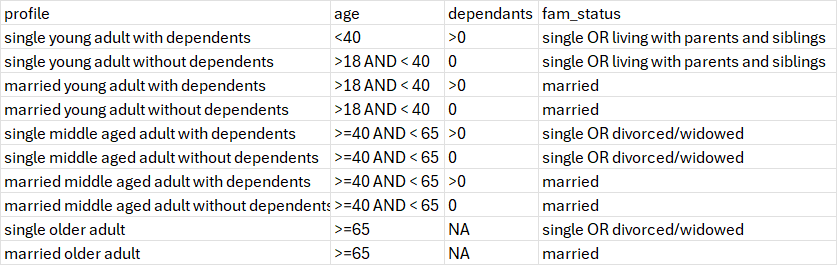

In [ ]:
# check min age of users to inform profiles
df_merge_active['age'].min()

In [ ]:
# Create the 'profile' column with a default value
df_merge_active['profile'] = "other"

In [ ]:
df_merge_active# Define profiles

# Single young adult with dependents
df_merge_active.loc[(df_merge_active['age'] < 40) & (df_merge_active['n_dependants'] > 0) & 
             (df_merge_active['fam_status'].isin(['single', 'living with parents and siblings'])), 'profile'] = 'single young adult with dependents'

# Single young adult without dependents
df_merge_active.loc[(df_merge_active['age'] > 18) & (df_merge_active['age'] < 40) & (df_merge_active['n_dependants'] == 0) & 
             (df_merge_active['fam_status'].isin(['single', 'living with parents and siblings'])), 'profile'] = 'single young adult without dependents'

# Married young adult with dependents
df_merge_active.loc[(df_merge_active['age'] > 18) & (df_merge_active['age'] < 40) & (df_merge_active['n_dependants'] > 0) & 
             (df_merge_active['fam_status'] == 'married'), 'profile'] = 'married young adult with dependents'

# Married young adult without dependents
df_merge_active.loc[(df_merge_active['age'] > 18) & (df_merge_active['age'] < 40) & (df_merge_active['n_dependants'] == 0) & 
             (df_merge_active['fam_status'] == 'married'), 'profile'] = 'married young adult without dependents'

# Single middle aged adult with dependents
df_merge_active.loc[(df_merge_active['age'] >= 40) & (df_merge_active['age'] < 65) & (df_merge_active['n_dependants'] > 0) & 
             (df_merge_active['fam_status'].isin(['single', 'divorced/widowed'])), 'profile'] = 'single middle aged adult with dependents'

# Single middle aged adult without dependents
df_merge_active.loc[(df_merge_active['age'] >= 40) & (df_merge_active['age'] < 65) & (df_merge_active['n_dependants'] == 0) & 
             (df_merge_active['fam_status'].isin(['single', 'divorced/widowed'])), 'profile'] = 'single middle aged adult without dependents'

# Married middle aged adult with dependents
df_merge_active.loc[(df_merge_active['age'] >= 40) & (df_merge_active['age'] < 65) & (df_merge_active['n_dependants'] > 0) & 
             (df_merge_active['fam_status'] == 'married'), 'profile'] = 'married middle aged adult with dependents'

# Married middle aged adult without df_merge_active
df_merge_active.loc[(df_merge_active['age'] >= 40) & (df_merge_active['age'] < 65) & (df_merge_active['n_dependants'] == 0) & 
             (df_merge_active['fam_status'] == 'married'), 'profile'] = 'married middle aged adult without dependents'

# Single older adult
df_merge_active.loc[(df_merge_active['age'] >= 65) & 
             (df_merge_active['fam_status'].isin(['single', 'divorced/widowed'])), 'profile'] = 'single older adult'

# Married older adult
df_merge_active.loc[(df_merge_active['age'] >= 65) & (df_merge_active['fam_status'] == 'married'), 'profile'] = 'married older adult'


#### Distribution of customer profile types

In [ ]:
df_merge_active['profile'].value_counts()

In [ ]:
df_merge_active['profile'].value_counts().plot.bar()

#### Descriptive statistics: Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure.

In [ ]:
#Group by 'profile' and find the maximum order value
df_merge_active.groupby('profile')['max_order'].max()

In [ ]:
#Group by 'profile' and find the maximum order value
df_merge_active.groupby('profile')['max_order'].mean()

In [ ]:
#Group by 'profile' and find the maximum order value
df_merge_active.groupby('profile')['max_order'].min()

In [ ]:
#Group by 'profile' and find the expenditure value
df_merge_active.groupby('profile')['spending'].max().round(2)

In [ ]:
#Group by 'profile' and find the expenditure value
df_merge_active.groupby('profile')['spending'].mean().round(2)

In [ ]:
#Group by 'profile' and find the expenditure value
df_merge_active.groupby('profile')['spending'].min().round(2)

## Income profiles

### Divide customers into income categories using percentiles

In [ ]:
# Divide income into percentiles
df_merge_active['income_category'] = pd.qcut(['income'], 
                                q=3,  # Number of quantiles (3 for low, middle, high)
                                labels=['Low', 'Middle', 'High'])

In [ ]:
df_merge_active['income_category'].value_counts()

In [ ]:
df_merge_active.groupby('income_category')['income'].max()

### Compare your customer profiles with regions and departments. Can you identify a link between them? Customers may demonstrate different behaviors across regions, which could make this information important.

In [ ]:
pd.crosstab(
    index = df_merge['region'],
    columns = df_merge['profile']
)

In [ ]:
df_merge['region'].value_counts().plot.bar()

In [ ]:
income_ct = pd.crosstab(
    index = df_merge['region'],
    columns = df_merge['income_category']
)

In [ ]:
income_ct.plot.bar()

In [ ]:
spending_ct = pd.crosstab(
    index = df_merge['spending_flag'],
    columns = df_merge['income_category']
)

In [ ]:
spending_ct

In [ ]:
spending_ct.plot(kind='bar', stacked=True, figsize=(8, 6))
plt.title('Income Category vs. Spending Flag')
plt.xlabel('Income Category')
plt.ylabel('Count')
plt.legend(title='Spending Flag')
plt.show()

### Low spender representated essentially equally by income types,  but this is not the case with the high spender category. This category is dominated by high income customers. This might be worth exploring.